In [33]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as ur
from bbmag import bb_abmag, sigerr
from tdsat_sensitivity import find_limit, compute_snr
from tdsat_telescope import load_telescope_parameters
from astropy.visualization import quantity_support
%matplotlib inline

In [34]:
plt.rcParams['figure.figsize'] = [15,10]

In [2]:
# Setup:
td1_band = [180,220]*ur.nm

td2_band = [[260,300],[260,340],[260,400]]*ur.nm
bbtemp = [15000,20000,30000]*ur.K

umag = 22*ur.ABmag

# Satellite details:
diameter, qe, psf_fwhm, efficiency = load_telescope_parameters(2, diag=True)
outofband_qe = 0.001
exposure = 300*ur.s

Telescope Configuration 2
Entrance Pupil diameter 30.0 cm
Optical Effifiency 0.67
PSF FWHM 9.0 arcsec
Effective Aperture 24.556058315617353 cm
Effective Area 473.5950925286613 cm2


In [3]:
# Calculate magnitudes in different bands:
bbmag = np.zeros([len(bbtemp),len(td2_band),2])
for i in range(0,len(bbtemp)):
    for j in range(0,len(td2_band)):
        bbmag[i,j] = bb_abmag(bbtemp=bbtemp[i], bandone=td1_band, 
                                  bandtwo=td2_band[j], umag=umag, val=True)

In [4]:
# Calculate signal-to-noise for each band (this is quite slow):
snrs = np.zeros([len(bbtemp),len(td2_band),2])
for i in range(0,len(bbtemp)):
    for j in range(0,len(td2_band)):
        snrs[i,j,0] = compute_snr(td1_band,bbmag[i,j,0]*ur.ABmag,
                                  low_zodi=True,diameter=diameter,
                                  exposure = exposure,
                                  efficiency = efficiency, qe = qe,
                                  outofband_qe = outofband_qe, psf_size = psf_fwhm)
        snrs[i,j,1] = compute_snr(td2_band[j],bbmag[i,j,1]*ur.ABmag,
                                  low_zodi=True,diameter=diameter,
                                  exposure = exposure,
                                  efficiency = efficiency, qe = qe,
                                  outofband_qe = outofband_qe, psf_size = psf_fwhm)
        
# Now into magnitude errors:
sigs = 2.5*np.log10(1.+1./snrs)

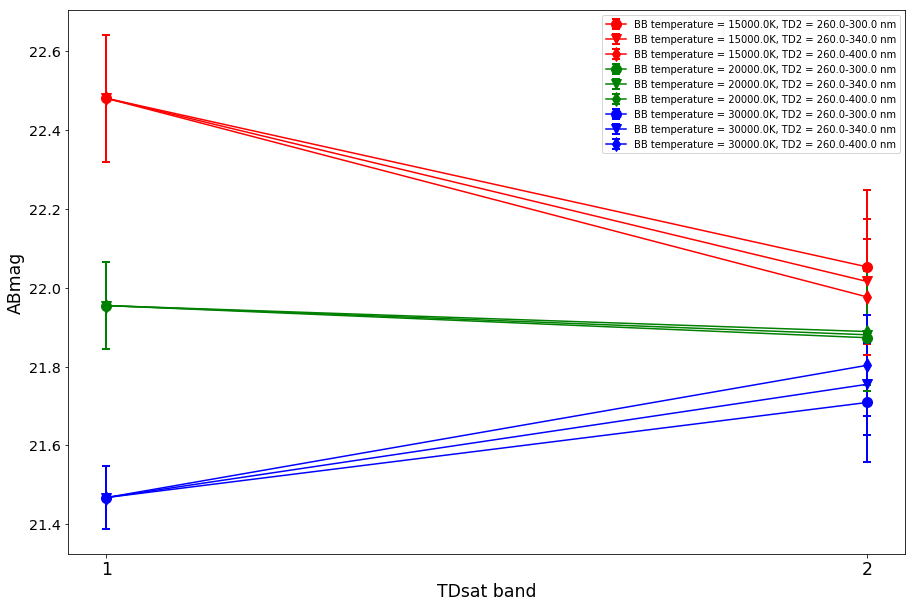

In [39]:
# Plot all this:
tempcol = ['red', 'green', 'blue']
bandmark = ['o','v','d']
for i in range(0,len(bbtemp)):
    for j in range(0,len(td2_band)):
        plt.errorbar([1,2],bbmag[i,j],yerr=sigs[i,j],marker=bandmark[j],color=tempcol[i],
                     ms=10,elinewidth=2,capthick=2,capsize=4,
                    label='BB temperature = '+str(bbtemp[i].value)+'K, TD2 = '+str(td2_band[j,0].value)+'-'+str(td2_band[j,1].value)+' nm')

ax = plt.gca()
plt.legend()
plt.xlabel('TDsat band',fontsize='xx-large')
plt.ylabel('ABmag',fontsize='xx-large')
plt.tick_params(axis='y',which='major',labelsize='x-large')
plt.tick_params(axis='x',which='major',labelsize='xx-large')
plt.xticks([1.,2.],[1,2])
plt.show()